In [1]:
#importing Python data ecosystems
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#establishing the dataframe "df" from the given json file
df = pd.read_json('transaction-data-adhoc-analysis.json')

#inital testing of dataframe "df"
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [2]:
#creating of item prices dictionary based on manual calculation
item_prices = {
'Exotic Extras,Beef Chicharon' : 1299,
'HealthyKid 3+,Yummy Vegetables' : 500,
'HealthyKid 3+,Gummy Vitamins' : 1500,
'HealthyKid 3+,Nutrional Milk' : 1990,
'Candy City,Gummy Worms' : 150,
'Candy City,Orange Beans' : 199,
'Exotic Extras,Kimchi and Seaweed' : 799,
}

#transforming into a granularity of one item per row
df['transaction_items'] = df['transaction_items'].apply(lambda x: x.split(';'))
df = df.explode('transaction_items')

#creating a transaction quantity column for the items
def transaction_quantity(row):
    return row['transaction_items'][-2]

df['transaction_quantity'] = df.apply(lambda row: transaction_quantity(row), axis=1)

#taking out respective quantities from the items
def remove_quantities(row):
    return row['transaction_items'][:-5]

df['transaction_items'] = df.apply(lambda row: remove_quantities(row), axis=1)

#recalculating the transaction values of each item (price x quantity)
def recalculating_values(row):
    return item_prices[row['transaction_items']] * int(row['transaction_quantity'])

df['transaction_value'] = df.apply(lambda row: recalculating_values(row), axis=1)

#creating a month number column for the transactions
def month_number(row):
    return row['transaction_date'][-4]
       
df['transaction_month'] = df.apply(lambda row: month_number(row), axis=1)

#converting string date time into python date time object
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

#creating an identification column for each transaction
df['transaction_id'] = df.index

#second testing of dataframe "df" after being cleaned
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_quantity,transaction_month,transaction_id
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon",5196,2022-01-12,4,1,0
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon",3897,2022-01-12,3,1,1
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Nutrional Milk",7960,2022-01-12,4,1,1
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans",199,2022-01-12,1,1,1
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins",4500,2022-01-08,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk",3980,2022-06-09,2,6,83034
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms",300,2022-06-09,2,6,83034
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk",1990,2022-06-03,1,6,83035
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms",450,2022-06-03,3,6,83035


January 2022 Sales Breakdown
(2022-01-01 to 2022-01-31)

Total Transactions: 27128
Total Sold Count: 68019
Total Sale Value: 62499914

                                  total_sold  item_price  subtotal_sale_value
transaction_items                                                            
Candy City,Gummy Worms                  9555         150              1433250
Candy City,Orange Beans                 9773         199              1944827
HealthyKid 3+,Yummy Vegetables          9957         500              4978500
Exotic Extras,Kimchi and Seaweed        9672         799              7727928
Exotic Extras,Beef Chicharon            9661        1299             12549639
HealthyKid 3+,Gummy Vitamins            9678        1500             14517000
HealthyKid 3+,Nutrional Milk            9723        1990             19348770


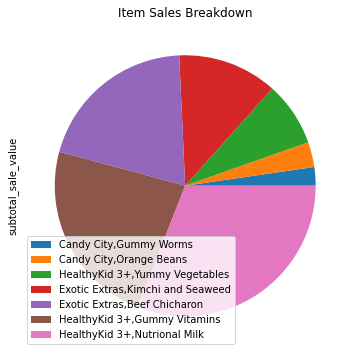

In [3]:
#breakdown of the total sale value for each item during a specific month
def monthly_breakdown(month, year):
    
    #setting start and end of the month based on string input 'month'
    if month == "January" and year == "2022":
        month_start = '2022-01-01'
        month_end = '2022-01-31'
    elif month == "February" and year == "2022":
        month_start = '2022-02-01'
        month_end = '2022-02-28'
    elif month == "March" and year == "2022":
        month_start = '2022-03-01'
        month_end = '2022-03-31'
    elif month == "April" and year == "2022":
        month_start = '2022-04-01'
        month_end = '2022-04-30'
    elif month == "May" and year == "2022":
        month_start = '2022-05-01'
        month_end = '2022-05-31'
    elif month == "June" and year == "2022":
        month_start = '2022-06-01'
        month_end = '2022-06-30'
    #showing wrong input message
    else:
        return "Insufficient Data"
    
    #limiting the month dataframe "month_df" based on the month input
    month_df = df.loc[(df['transaction_date'] >= pd.to_datetime(month_start)) & (df['transaction_date'] <= pd.to_datetime(month_end))]

    #defining sales breakdown function based on dataframe
    def sales_breakdown(dataframe):
        
        #setting dictionary for the total item quantities for the specific month
        total_quantities = {}
        
        #counting the total item quantities by going through the transactions during the month
        for index, row in dataframe.iterrows():
            line_item = row['transaction_items']
            if line_item in total_quantities:
                total_quantities[line_item] += int(row['transaction_quantity'])
            else:
                total_quantities[line_item] = 0

        #creating the monthly sales breakdown dataframe
        monthly_sales = pd.DataFrame(total_quantities.items(), columns = ['transaction_items', 'total_sold',])

        #defining the item price colummn based on the prices of the respectvive items
        def item_price_column(row):
            return item_prices[row['transaction_items']]
        
        monthly_sales['item_price'] = monthly_sales.apply(lambda row: item_price_column(row), axis=1)
        
        #defining the subtotal sale value colummn based on the prices and total sold of the respectvive items
        def sales_column(row):
            return item_prices[row['transaction_items']] * row['total_sold']

        monthly_sales['subtotal_sale_value'] = monthly_sales.apply(lambda row: sales_column(row), axis=1)
        
        #fixing the monthly sales to become more presentable
        monthly_sales = monthly_sales.reset_index(drop = True)
        monthly_sales = monthly_sales.set_index('transaction_items')
        monthly_sales = monthly_sales.sort_values(by = 'subtotal_sale_value')
        
        #counting the total transactions of the month
        total_transactions = len(month_df.index)
        
        #providing a pie chart to visualize the count and sale value of each item during the inputted month
        monthly_sales.plot.pie(y = 'subtotal_sale_value', figsize = (11,6), labels = None, fontsize = 10, title = 'Item Sales Breakdown')
        
        #including more relevant information
        print("Total Transactions: {}".format(total_transactions))
        print("Total Sold Count: {}".format(monthly_sales['total_sold'].sum()))
        print("Total Sale Value: {}".format(monthly_sales['subtotal_sale_value'].sum()))
        print()
        return monthly_sales
    
    #including more relevant information
    print("{} {} Sales Breakdown".format(month, year))
    print("({} to {})".format(month_start, month_end))
    print()
    print(sales_breakdown(month_df))
    return 

#inputting a specific month and year string
monthly_breakdown("January", "2022")

February 2022 Sales Breakdown
(2022-02-01 to 2022-02-28)

Total Transactions: 27975
Total Sold Count: 69894
Total Sale Value: 63805240

                                  total_sold  item_price  subtotal_sale_value
transaction_items                                                            
Candy City,Gummy Worms                  9994         150              1499100
Candy City,Orange Beans                10035         199              1996965
HealthyKid 3+,Yummy Vegetables         10254         500              5127000
Exotic Extras,Kimchi and Seaweed        9945         799              7946055
Exotic Extras,Beef Chicharon           10000        1299             12990000
HealthyKid 3+,Gummy Vitamins            9978        1500             14967000
HealthyKid 3+,Nutrional Milk            9688        1990             19279120


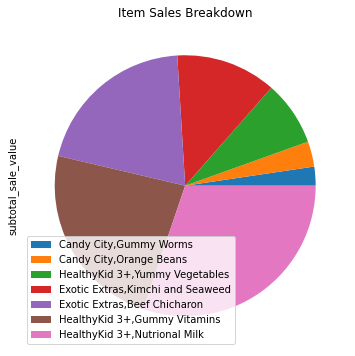

In [5]:
monthly_breakdown("February", "2022")

March 2022 Sales Breakdown
(2022-03-01 to 2022-03-31)

Total Transactions: 27850
Total Sold Count: 69282
Total Sale Value: 63928980

                                  total_sold  item_price  subtotal_sale_value
transaction_items                                                            
Candy City,Gummy Worms                  9984         150              1497600
Candy City,Orange Beans                 9610         199              1912390
HealthyKid 3+,Yummy Vegetables          9892         500              4946000
Exotic Extras,Kimchi and Seaweed        9966         799              7962834
Exotic Extras,Beef Chicharon            9814        1299             12748386
HealthyKid 3+,Gummy Vitamins           10143        1500             15214500
HealthyKid 3+,Nutrional Milk            9873        1990             19647270


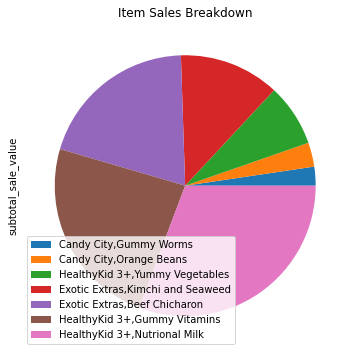

In [6]:
monthly_breakdown("March", "2022")

April 2022 Sales Breakdown
(2022-04-01 to 2022-04-30)

Total Transactions: 27762
Total Sold Count: 69236
Total Sale Value: 63403264

                                  total_sold  item_price  subtotal_sale_value
transaction_items                                                            
Candy City,Gummy Worms                 10040         150              1506000
Candy City,Orange Beans                 9910         199              1972090
HealthyKid 3+,Yummy Vegetables          9857         500              4928500
Exotic Extras,Kimchi and Seaweed        9918         799              7924482
Exotic Extras,Beef Chicharon            9888        1299             12844512
HealthyKid 3+,Gummy Vitamins            9841        1500             14761500
HealthyKid 3+,Nutrional Milk            9782        1990             19466180


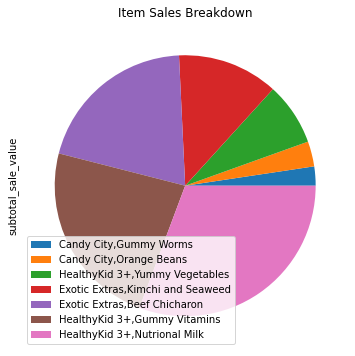

In [7]:
monthly_breakdown("April", "2022")

May 2022 Sales Breakdown
(2022-05-01 to 2022-05-31)

Total Transactions: 27703
Total Sold Count: 69108
Total Sale Value: 63722397

                                  total_sold  item_price  subtotal_sale_value
transaction_items                                                            
Candy City,Gummy Worms                  9797         150              1469550
Candy City,Orange Beans                 9960         199              1982040
HealthyKid 3+,Yummy Vegetables          9734         500              4867000
Exotic Extras,Kimchi and Seaweed        9769         799              7805431
Exotic Extras,Beef Chicharon           10024        1299             13021176
HealthyKid 3+,Gummy Vitamins            9944        1500             14916000
HealthyKid 3+,Nutrional Milk            9880        1990             19661200


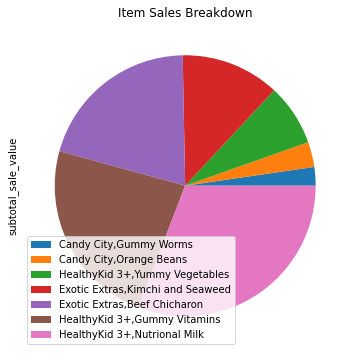

In [8]:
monthly_breakdown("May", "2022")

June 2022 Sales Breakdown
(2022-06-01 to 2022-06-30)

Total Transactions: 27701
Total Sold Count: 69500
Total Sale Value: 63690883

                                  total_sold  item_price  subtotal_sale_value
transaction_items                                                            
Candy City,Gummy Worms                  9933         150              1489950
Candy City,Orange Beans                10104         199              2010696
HealthyKid 3+,Yummy Vegetables          9718         500              4859000
Exotic Extras,Kimchi and Seaweed       10102         799              8071498
Exotic Extras,Beef Chicharon            9901        1299             12861399
HealthyKid 3+,Gummy Vitamins            9976        1500             14964000
HealthyKid 3+,Nutrional Milk            9766        1990             19434340


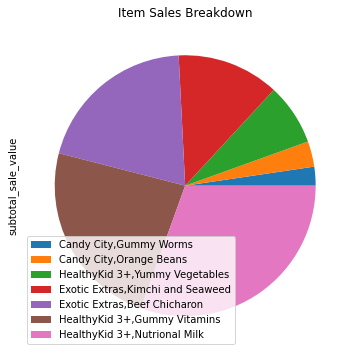

In [10]:
monthly_breakdown("June", "2022")

In [11]:
#defining the months fnuction to help get individual dataframes per month based on moth start and end input
def months(month_start, month_end):
    months_df = df.loc[(df['transaction_date'] >= pd.to_datetime(month_start)) & (df['transaction_date'] <= pd.to_datetime(month_end))]
    return months_df

January_2022 = months('2022-01-01', '2022-01-31')
February_2022 = months('2022-02-01', '2022-02-28')
March_2022 = months('2022-03-01', '2022-03-31')
April_2022 = months('2022-04-01', '2022-04-30')
May_2022 = months('2022-05-01', '2022-05-31')
June_2022 = months('2022-06-01', '2022-06-30')

#creating the list of month dataframes for future reference
month_list = [January_2022, February_2022, March_2022, April_2022, May_2022, June_2022]

#defining the repeater check function based on month input
def repeater_check(month):
    
    #setting the month number basaed on month string input
    if month == "January":
        month_num = 1
    elif month == "February":
        month_num = 2
    elif month == "March":
        month_num = 3
    elif month == "April":
        month_num = 4
    elif month == "May":
        month_num = 5
    elif month == "June":
        month_num = 6
    #showing wrong input message
    else:
        return "Insufficient Data"
    
    #separating January month input code because there are no previous months
    if month in ["February", "March", "April", "May", "June"]:
        
        #setting current and previous users based on month input (previous month only)
        current_users = month_list[month_num - 1]['name'].unique()
        previous_users = month_list[month_num - 2]['name'].unique()
        
        #counting the users that repeat from previous and current month
        rep = 0
        for name in current_users:
            if name in previous_users:
                rep += 1
                
    #January special case of no repeater users since no previous months
    else:
        rep = 0
    
    #returning repeater count for the inputted month
    return rep

#inputting all months into the function and creating a series for the specific months and their respective repeating user counts
repeater_set = {i:repeater_check(i) for i in ["January", "February", "March", "April", "May", "June"]}
repeaters = pd.Series(repeater_set)

#testing repeaters series functionality
repeaters

January        0
February    5172
March       5216
April       5154
May         5110
June        5193
dtype: int64

In [12]:
#defining the inactive check function based on month input
def inactive_check(month):
    
    #setting the month number basaed on month string input
    if month == "January":
        month_num = 1
    elif month == "February":
        month_num = 2
    elif month == "March":
        month_num = 3
    elif month == "April":
        month_num = 4
    elif month == "May":
        month_num = 5
    elif month == "June":
        month_num = 6
    #showing wrong input message
    else:
        return "Insufficient Data"
    
     #separating January month input code because there are no previous months
    if month in ["February", "March", "April", "May", "June"]:
        
        #setting current and previous users based on month input (all previous months)
        current_users = month_list[month_num - 1]['name'].unique()
        previous_users = month_list[month_num - 2]['name'].unique()
        previous_users = month_list[month_num - 3]['name'].unique()
        previous_users = month_list[month_num - 4]['name'].unique()
        previous_users = month_list[month_num - 5]['name'].unique()
        previous_users = month_list[month_num - 6]['name'].unique()
        
        #counting the users that are active from previous months but inactive in current
        ina = 0
        for name in previous_users:
            if name not in current_users:
                ina += 1
                
    #January special case of no inactive users since no previous months
    else:
        ina = 0
        
    #returning inactive count for the inputted month
    return ina

#inputting all months into the function and creating a series for the specific months and their respective inactive user counts
inactive_set = {i:inactive_check(i) for i in ["January", "February", "March", "April", "May", "June"]}
inactives = pd.Series(inactive_set)

#testing inactives series functionality
inactives

January        0
February    1406
March       1402
April       1458
May         1459
June        1393
dtype: int64

In [13]:
#defining the engaged check function based on month input
def engaged_check(month):
    
    #setting the specific users per month based on name only
    january_users = month_list[0]['name'].unique()
    february_users = month_list[1]['name'].unique()
    march_users = month_list[2]['name'].unique()
    april_users = month_list[3]['name'].unique()
    may_users = month_list[4]['name'].unique()
    june_users = month_list[5]['name'].unique()
    
    #establishing the engaged users list
    eng = []
    
    #checking if users in current month have been active in all previous months and adding those that do to the engaged users list based on inputted month
    if month == "January":
        for name in january_users:
            eng.append(name)
    elif month == "February":
        for name in february_users:
            if name in january_users:
                eng.append(name)
    elif month == "March":
        for name in march_users:
            if name in january_users and name in february_users:
                eng.append(name)
    elif month == "April":
        for name in april_users:
            if name in january_users and name in february_users and name in march_users:
                eng.append(name)
    elif month == "May":
        for name in may_users:
            if name in january_users and name in february_users and name in march_users and name in april_users:
                eng.append(name)
    elif month == "June":
        for name in june_users:
            if name in january_users and name in february_users and name in march_users and name in april_users and name in may_users:
                eng.append(name)
    #showing wrong input message
    else:
        return "Insufficient Data"
    
    #returning engaged count for the inputted month
    return len(eng)

#inputting all months into the function and creating a series for the specific months and their respective engaged user counts
engaged_set = {i:engaged_check(i) for i in ["January", "February", "March", "April", "May", "June"]}
engaged = pd.Series(engaged_set)

#testing engaged series functionality
engaged

January     6588
February    5172
March       4126
April       3289
May         2667
June        2190
dtype: int64

In [14]:
#combining the three metrics into one dataframe "metrics_df"
metrics_df = pd.DataFrame({'repeaters':repeaters, 'inactive':inactives, 'engaged':engaged}).transpose()

#testing dataframe "metrics_df" functionality
metrics_df

,January,February,March,April,May,June
repeaters,0,5172,5216,5154,5110,5193
inactive,0,1406,1402,1458,1459,1393
engaged,6588,5172,4126,3289,2667,2190


<AxesSubplot:>

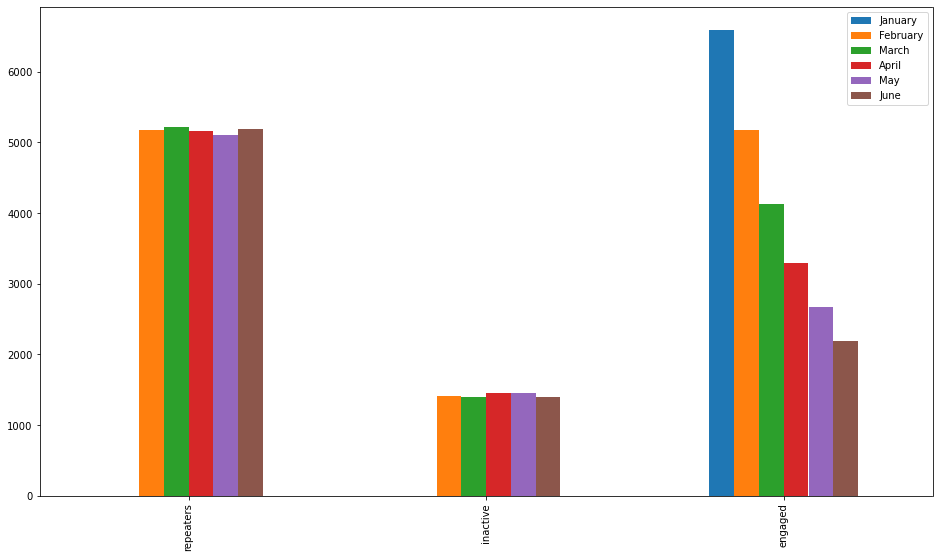

In [15]:
#providing a bar graph to visualize the repeaters, inactive, and engaged users for each month
metrics_df.plot.bar(figsize=(16,9))